In [1]:
# 1. Read in files
# import brewer2mpl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import *
from scipy import *
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import numpy as np
# from mnist import MNIST
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

In [2]:
## Load in metada tafile
# 1. read metadata;
# smp_2_size, smp_2_donor
smp_2_size = {}
smp_2_donor = {}
smp_2_species = {}
smp_2_align = {}
species_2_phylum = {}
smp_2_phylum={}
Filtered_Species_smplist={}
Filtered_Species_donorlist={}
Filtered_Species_sizelist={}
with open('../Intermediary-files/filtered_samples.csv') as file:
    for line in file:
        if 'GenomeSize' not in line:
            smp, sp, size, donor, align, phylum = line.strip().split(',')[0],line.strip().split(',')[1], int(line.strip().split(',')[2]), line.strip().split(',')[3],line.strip().split(',')[4],line.strip().split(',')[7]
            smp_2_size[smp] = size
            smp_2_donor[smp] = donor
            smp_2_species[smp]=sp
            smp_2_align[smp]=align
            smp_2_phylum[smp]=phylum
            species_2_phylum[sp]=phylum
            if sp not in Filtered_Species_smplist:
                Filtered_Species_smplist[sp]=[]
                Filtered_Species_donorlist[sp]={}
                Filtered_Species_sizelist[sp]=[]
            Filtered_Species_smplist[sp].append(smp)
            Filtered_Species_sizelist[sp].append(size)
            if donor not in Filtered_Species_donorlist[sp]:
                Filtered_Species_donorlist[sp][donor]=[]
            Filtered_Species_donorlist[sp][donor].append(smp)

In [3]:
for sp in Filtered_Species_smplist:
    if len(Filtered_Species_smplist[sp])>1000:
        print(sp,len(Filtered_Species_smplist[sp]),len(Filtered_Species_donorlist[sp]))

Bacteroides_uniformis 1506 479
Parabacteroides_distasonis 2212 420
Escherichia_coli 2640 520
Bifidobacterium_longum 3930 551
Bifidobacterium_adolescentis 6100 517


In [8]:
# 2. Read in data for data structure (SNP positions)
# Extract arguments passed to the script
import gzip

species = 'Bifidobacterium_longum'
donor = 'H16'

# Initialize data structures for storing DNA sequence information
DataStructure = {}    # Main structure holding DNA sequences
SampleList = []       # List of sample IDs
SampleCoverage = {}   # Maps sample ID to its coverage value
DataStructure[donor] = {}

# Process each sample for the specified species and donor
for smp in Filtered_Species_donorlist[species][donor]:
    file_path = f'../Intermediary-files/alignment-data/{species}/{smp}.txt.gz'
    # Check if the file exists before proceeding
    if os.path.exists(file_path):
        with gzip.open(file_path, 'rt') as gg:
            lines = gg.readlines()
            SampleList.append(smp)
            seq = lines[1]  # The DNA sequence
            DataStructure[donor][smp] = seq
            cov = lines[0].split('\n')[0]  # The coverage value
            SampleCoverage[smp] = int(cov)
            # print(smp)

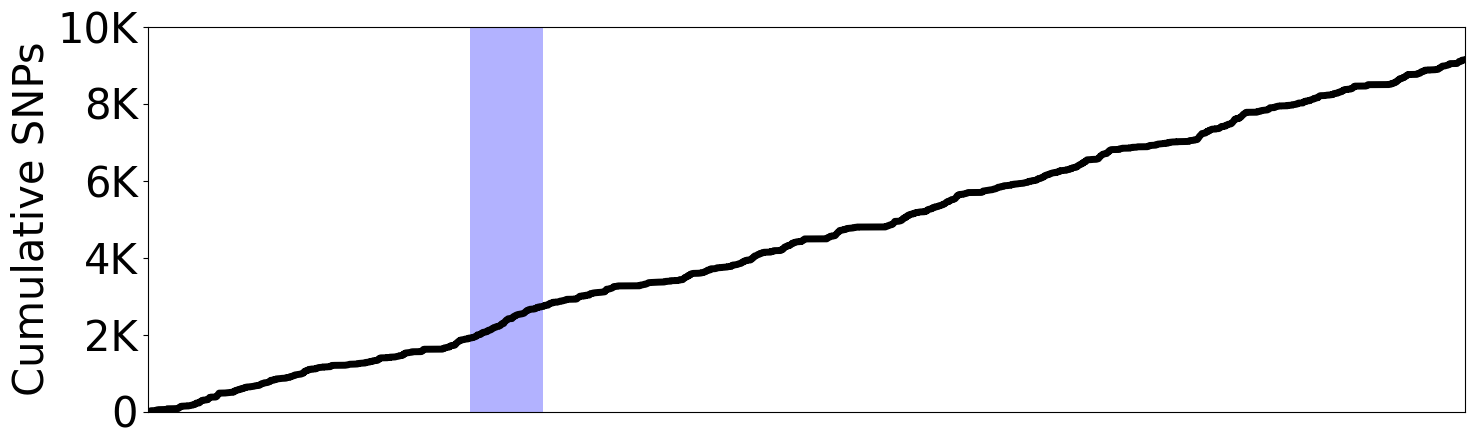

In [10]:
smp1='BFD-02_E06'
smp2='BFD-02_C07'

seq1 = DataStructure[donor][smp1]
seq2 = DataStructure[donor][smp2]
fig, ax = plt.subplots(figsize=(17, 5))  # Set the width and height in inches

good_cord = []
dif_cord_x = []
dif_cord_y = []
xs=[]
ys=[]
y=0
x=0
for nt1, nt2, cord in zip(seq1,seq2,range(len(seq1))):
    if nt1!='0' and nt2!='0':
        good_cord.append(cord)
        if nt1!=nt2:
            y+=1
            dif_cord_x.append(x)
            dif_cord_y.append(y)
        
        xs.append(x)
        ys.append(y)
    x+=1
# Create a rectangle patch with transparent blue color
rectangle = patches.Rectangle((588000, -1), 133000, 10200, linewidth=1, edgecolor='none', facecolor=(0, 0, 1, 0.3))
plt.plot(dif_cord_x,dif_cord_y,'black',linewidth=5)

# Add the rectangle patch to the axis
ax.add_patch(rectangle)
plt.xlim(0,2400000)
plt.ylim(0,10000)


# Add labels and a legend
# plt.xlabel('Genomic coordinates (Mbp)', fontsize=30)
plt.ylabel('Cumulative SNPs', fontsize=30)

# Customize x-axis tick labels
empty = []
x_ticks_positions = [0, 500000,1000000,1500000,2000000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["0","0.5","1","1.5","2"]  # Positions where custom labels will be placed
plt.xticks(empty, empty, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = [0,2000,4000,6000,8000,10000]  # Positions where custom labels will be placed
cus_y_ticks_positions = ["0","2K","4K","6K","8K","10K"]
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)

plt.yticks(fontsize=30)
fig.savefig('figures/Figure2E-background.pdf', dpi=600, bbox_inches='tight')


# select_dif_region = dif_cord_x[600000<dif_cord_x<700000]

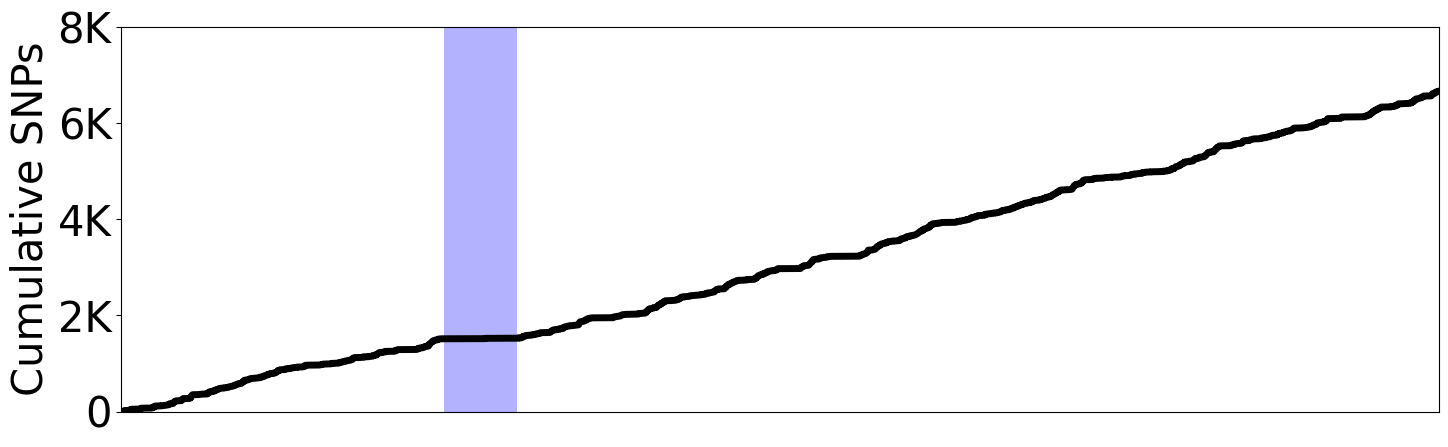

In [11]:
smp2='BFD-27_G06'
smp1='BFD-02_C07'

seq1 = DataStructure[donor][smp1]
seq2 = DataStructure[donor][smp2]
fig, ax = plt.subplots(figsize=(17, 5))  # Set the width and height in inches

good_cord = []
dif_cord_x = []
dif_cord_y = []
xs=[]
ys=[]
y=0
x=0
for nt1, nt2, cord in zip(seq1,seq2,range(len(seq1))):
    if nt1!='0' and nt2!='0':
        good_cord.append(cord)
        if nt1!=nt2:
            y+=1
            dif_cord_x.append(x)
            dif_cord_y.append(y)
        
        xs.append(x)
        ys.append(y)
    x+=1
# Create a rectangle patch with transparent blue color
rectangle = patches.Rectangle((588000, -1), 133000, 8000, linewidth=1, edgecolor='none', facecolor=(0, 0, 1, 0.3))
plt.plot(dif_cord_x,dif_cord_y,'black',linewidth=5)

# Add the rectangle patch to the axis
ax.add_patch(rectangle)



# Add labels and a legend
# plt.xlabel('Genomic coordinates (Mbp)', fontsize=30)
plt.ylabel('Cumulative SNPs', fontsize=30)
# Customize x-axis tick labels
empty = []
x_ticks_positions = [0, 500000,1000000,1500000,2000000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["0","0.5","1","1.5","2"]  # Positions where custom labels will be placed
plt.xticks(empty, empty, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = [0,2000,4000,6000,8000,10000]  # Positions where custom labels will be placed
cus_y_ticks_positions = ["0","2K","4K","6K","8K","10K"]
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)

plt.yticks(fontsize=30)
plt.xlim(0,2400000)
plt.ylim(0,8000)
fig.savefig('figures/Figure2E-background2.pdf', dpi=600, bbox_inches='tight')


# select_dif_region = dif_cord_x[600000<dif_cord_x<700000]

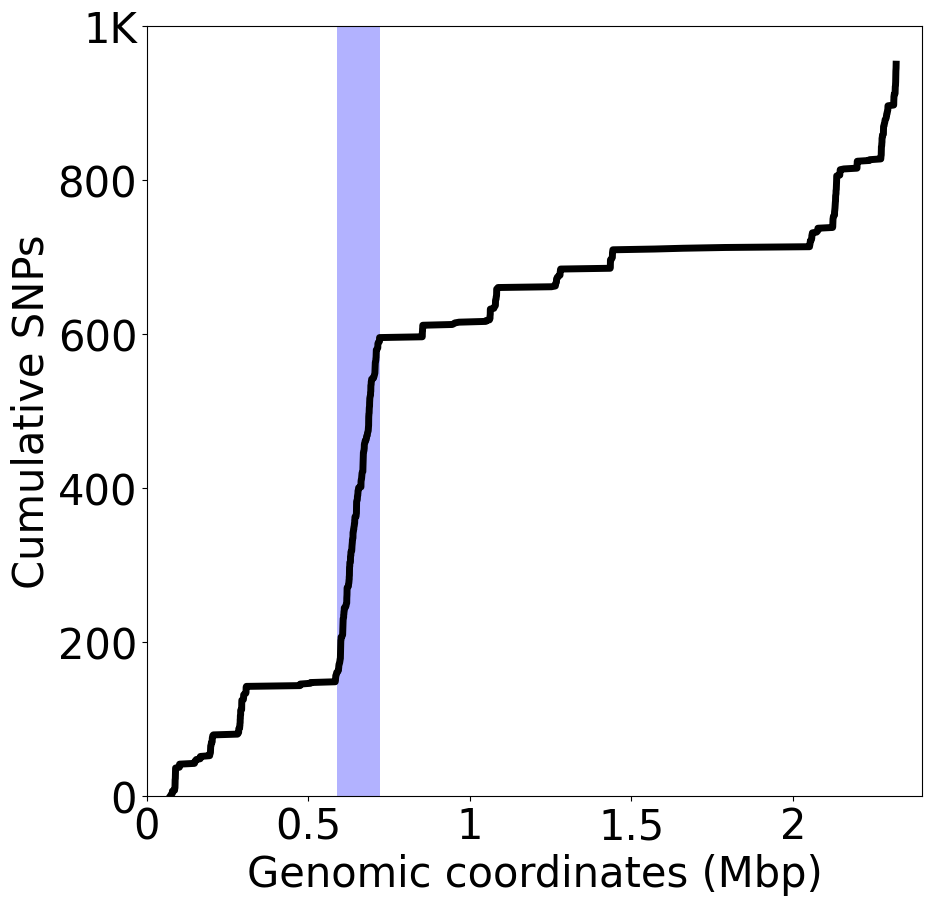

In [12]:
smp1='BFD-02_E06'
smp2='BFD-27_G06'

seq1 = DataStructure[donor][smp1]
seq2 = DataStructure[donor][smp2]
fig, ax = plt.subplots(figsize=(10, 10))  # Set the width and height in inches

good_cord = []
dif_cord_x = []
dif_cord_y = []
xs=[]
ys=[]
y=0
x=0
for nt1, nt2, cord in zip(seq1,seq2,range(len(seq1))):
    if nt1!='0' and nt2!='0':
        good_cord.append(cord)
        if nt1!=nt2:
            y+=1
            dif_cord_x.append(x)
            dif_cord_y.append(y)
        
        xs.append(x)
        ys.append(y)
    x+=1
# Create a rectangle patch with transparent blue color
rectangle = patches.Rectangle((588000, -1), 133000, 10200, linewidth=1, edgecolor='none', facecolor=(0, 0, 1, 0.3))
plt.plot(dif_cord_x,dif_cord_y,'black',linewidth=5)

# Add the rectangle patch to the axis
ax.add_patch(rectangle)
plt.xlim(0,2400000)
plt.ylim(0,1000)


# Add labels and a legend
plt.xlabel('Genomic coordinates (Mbp)', fontsize=30)
plt.ylabel('Cumulative SNPs', fontsize=30)

# Customize x-axis tick labels
empty = []
x_ticks_positions = [0, 500000,1000000,1500000,2000000]  # Positions where custom labels will be placed
custome_x_ticks_positions = ["0","0.5","1","1.5","2"]  # Positions where custom labels will be placed
plt.xticks(x_ticks_positions, custome_x_ticks_positions, fontsize=30)

# # Customize x-axis tick labels
y_ticks_positions = [0,200,400,600,800,1000]  # Positions where custom labels will be placed
cus_y_ticks_positions = ["0","200","400","600","800","1K"]
plt.yticks(y_ticks_positions, cus_y_ticks_positions, fontsize=30)

plt.yticks(fontsize=30)
fig.savefig('figures/Figure2E.pdf', dpi=600, bbox_inches='tight')


# select_dif_region = dif_cord_x[600000<dif_cord_x<700000]

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Assuming dif_cord_x is a list
reordered_samples=[14,15,7,6,1,12,17,10,0,20,19,11,4,21,13,18,16,9,8,5,3,2]
smplist = []
for smp in DataStructure[donor]:
    smplist.append(smp)

select_dif_region = []
for x in range(len(DataStructure[donor][smplist[0]])):
    if 450000 < x < 900000:
        if x %10000==0:
            print(x)
        nts_at_pos_x = []
        for i in reordered_samples:
            smp = smplist[i]
            nts_at_pos_x.append(DataStructure[donor][smp][x])
        frequency = Counter(nts_at_pos_x)
        if len(frequency)>=2 and '0' not in frequency:
            select_dif_region.append(x)
            # if x == 551964:
            #     print(nts_at_pos_x, frequency)
            # elif len(frequency)==3 and frequency['0']<2:
            #     select_dif_region.append(x)




460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000


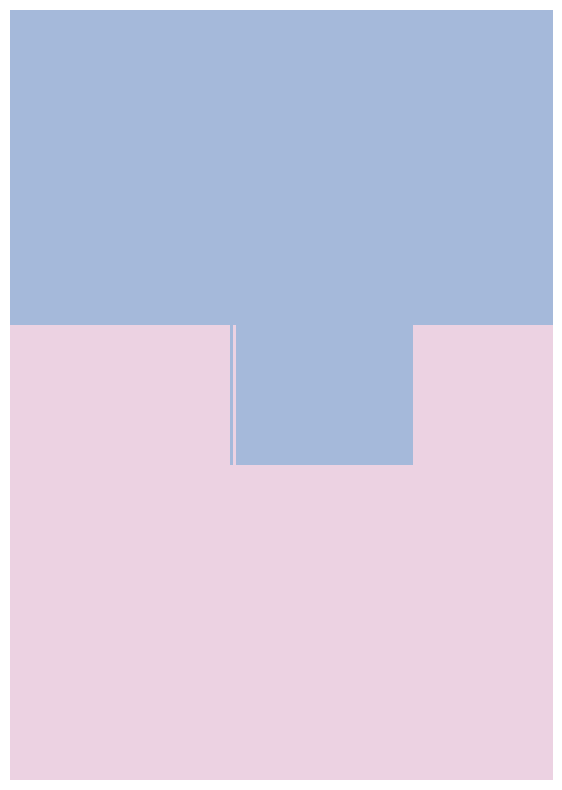

In [14]:
smp1='BFD-02_E06'
smp2='BFD-27_C09'
seq1 = DataStructure[donor][smp1]
seq2 = DataStructure[donor][smp2]
fig, ax = plt.subplots(figsize=(7, 10))  # Set the width and height in inches

haplotype=[]
for smpidx in reordered_samples:
    seq3 = DataStructure[donor][smplist[smpidx]]
    tmp=[]
    a=0
    b=0
    for pos in select_dif_region:
        nt1 = seq1[pos]
        nt2 = seq2[pos]
        nt3 = seq3[pos]
        if nt1!='0' and nt2!='0' and nt1 != nt2:
            # print(nt1,nt2)
            # tmp.append(int(nt3))
            if nt3 =='0':
                print(pos)
            if nt3==nt1:
                tmp.append(1)
                a+=1
            elif nt3==nt2:
                tmp.append(-1)
                b+=1
            else:
                # print(nt1,nt2,nt3)
                tmp.append(0)
    
    haplotype.append(tmp)
# Generate some random data for demonstration

# Plotting the heatmap using Seaborn
# Define your custom color palette
# custom_colors = ["lightgray","#618CC7", "orange","teal", "#F18C8E"]
custom_colors = ["#6A8BC2","orange","#E0B5CF"]


# Plotting the heatmap using seaborn
sns.heatmap(np.array(haplotype), cmap=sns.color_palette(custom_colors),alpha=0.6,cbar=False)

# Customize x-axis tick labels

plt.yticks([], [], fontsize=30)

plt.xticks([], [], fontsize=30)
fig.savefig('figures/Figure2D.pdf', dpi=600, bbox_inches='tight')

plt.show()